# 1. Data preparation and cleaning
## The dataset 
The dataset used in this project contains data on all property sales in King County from May 2014 to May 2015. King County is located in the U.S. state of Washington, including Seattle which is also the state's most populous city.
With the data the following metadata was provided:

The variables/features of the dataset are:
* `id` - Unique identified for a house
* `date` - Date house was sold
* `price` - Price is prediction target
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Footage of the house
* `sqft_lot` - Square footage of the lot
* `floors` - Floors (levels) in house
* `waterfront` - house which has a view to a waterfront
* `view` - has been viewed
* `condition` - How good the condition is ( Overall )
* `grad` - Overall grade given to the housing unit, based on King County grading system
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Built Year
* `yr_renovate` - Year when house was renovated
* `zipcod` - zip
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Setup
Import required libaries and load the data

In [9]:
# load the libaries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder

from scipy import stats
from datetime import datetime, date, time, timedelta
from scipy import stats 

%matplotlib inline

In [10]:
# load the data
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

## First look at the data

Let´s take a first look at the data to check for data types and integrity of the features. To get a first impression of the distribution of the data, let's also take a look at the histogram of each feature. 

In [11]:
# get non-null counts and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [12]:
# take a look at the first ten rows
df.head(10) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


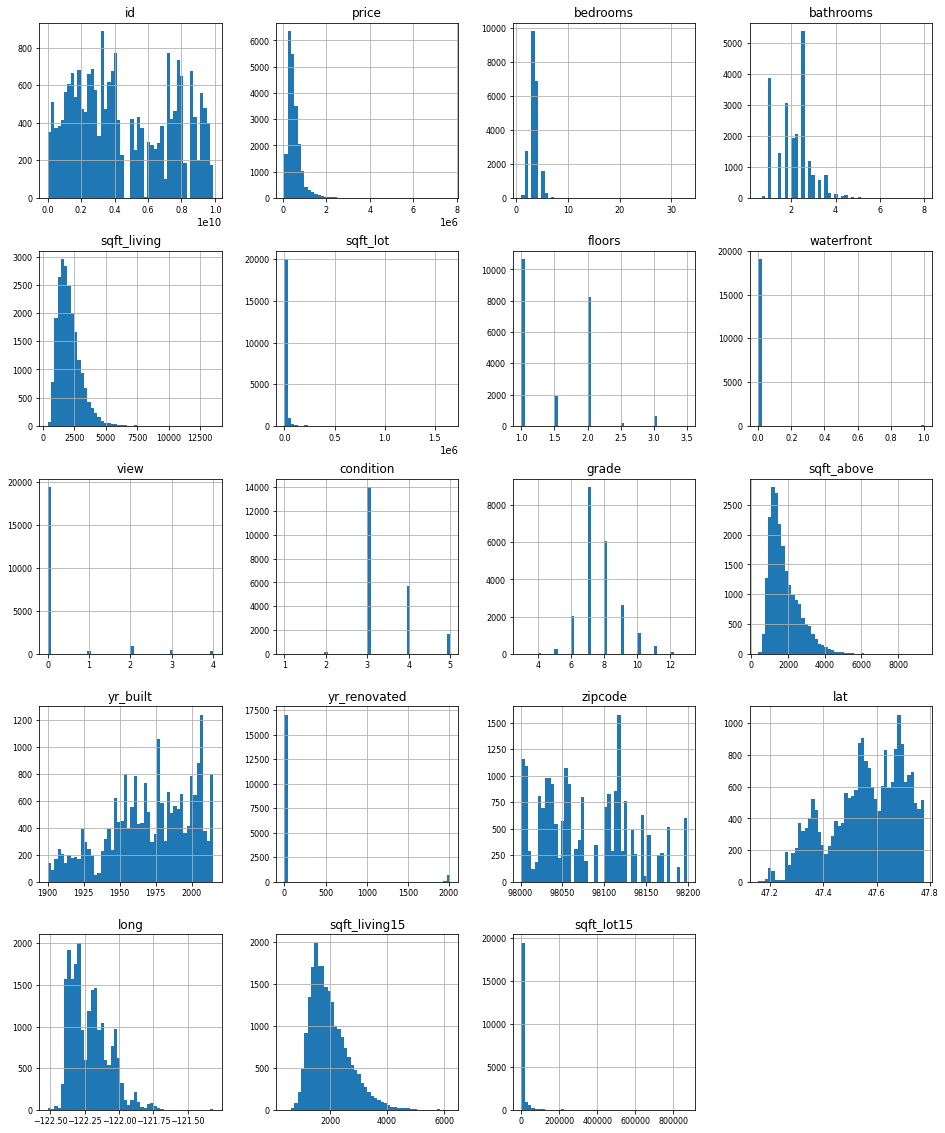

In [13]:
# take a look at the histograms 
df.hist(figsize = (16,20), bins = 50, xlabelsize = 8, ylabelsize =8); 

To further explore the data, we will look at the describtive statistics of the different features. Therefore we use the `describe()` function which gives the count, mean, standard deviation, minimum and maximum values as well as different quantiles (25%, 50% and 75%), while the 50% quantil is also the median.

In [14]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


### Conclusion first look at the data:
* `date` is an object and not in a datetime format - needs to be converted
* there is one house with 33 `bedroom` (max value) - seems strange
* `waterfront`, `view` and `yr_renovated` have not 21597 non-null counts - there are missing values
* `sqft_basement` and `year_renovated` need further transformation (`sqft_basement` contains a '?')
* Some new features could be beneficial
* Some variables contain no useful information

## Data fitting and cleaning
### 1. Fixing of missing values

In [15]:
# check where NaN are involved and calculation of the missing values as a percentage
missing_values = pd.DataFrame(df.isnull().sum(),columns=['count'])
missing_values['percentage'] = (missing_values['count']/df.shape[0]*100).round(2)
missing_values.query('count != 0')

,count,percentage
waterfront,2376,11.00
view,63,0.29
yr_renovated,3842,17.79


In [16]:
# check how the distribution of the data is for the features with missing values
print('waterfront:')
print(df['waterfront'].value_counts()) 
print('---'*20)
print('view:')
print(df['view'].value_counts()) 
print('---'*20)
print('yr_renovated:')
print(df['yr_renovated'].value_counts()) 
print('---'*20)

waterfront:
0.0    19075
1.0      146
Name: waterfront, dtype: int64
------------------------------------------------------------
view:
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
------------------------------------------------------------
yr_renovated:
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64
------------------------------------------------------------


From this I concluded the following:
* `waterfront`: Convert missing values (NaN) to 0 as the feature can have only the value 0 (= no waterfront) or 1 (= waterfront)
* `view`: Convert NaN to 0 as the feature view describes if the house has been viewed. There are only 0.29% missing - assume NaN have not been viewed
* `yr_renovated`: Replace 0 with NaN as zero renovation date is no renovation
* `sqft_basement`: Remove ? and replace 0 with NaN as a house with a basement of zero square footage has no basement.

In [17]:
# waterfront: convert NaN to 0
df.waterfront.fillna(0, inplace=True)

# view: convert NaN to 0 
df['view'].fillna(0, inplace=True)

# yr_renovated: replace 0 with NaN
df['yr_renovated'].replace(0, np.nan, inplace=True)

# sqft_basement: remove '?' with NaN
df['sqft_basement'].replace('?', np.nan, inplace=True)
# remove 0 with NaN
df['sqft_basement'].replace('0.0', np.nan, inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

### 2. Fixing of data types

In [18]:
# check the feature datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  8317 non-null   float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   744 non-null    float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From this I conclude the following:
* `date`: Needs to be converted to pandas datetime format
* `waterfront` and `view`: convert to int64
* `zipcode`: convert to category

In [19]:
# date: convert to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# waterfront & view: convert to int64
df['waterfront'] = df['waterfront'].astype('int64') 
df['view'] = df['view'].astype('int64')

# zipcode: convert to category
df['zipcode'] = df['zipcode'].astype('category')

### 3. Getting dummy variables and calculate new variables

Convert variables to dummy variables or create new dummy variables (feature either present or not) and create new variables from logic interpretation.

In [20]:
# short function to transform feature into categorical  
# dummy with (1) presence or (0) absence of a feature
def if_value(x):
    if x > 0:
        return 1
    else:
        return 0   

# get a new feature to differenciate if renovated or not renovated
df['renovated'] = df['yr_renovated'].apply(lambda x: if_value(x))
df['renovated'] = df['renovated'].astype('int64') # convert into int

# get a new feature to differenciate if renovated or not renovated
df['basement'] = df['sqft_basement'].apply(lambda x: if_value(x))
df['basement'] = df['basement'].astype('uint8')

# get the year of sale 
df['yr_sale'] = df['date'].dt.year
# get the month of sale
df['mo_sale'] = df['date'].dt.month
# get the 

df['sqft_price']= df['price']/df['sqft_living']
df['sqft_lot_price']= df['price']/df['sqft_lot']

### 4. Delete irrelevant variables
Delete `id` and `date` as they are not needed anymore.

In [21]:
df = df.drop(['id', 'date'], axis = 1)

### 4. Check strange values

#### Check house with 33 bedrooms
The maximum number of `bedrooms` seems strange: 33 bedrooms in one house. Let´s take a closer look

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,renovated,basement,yr_sale,mo_sale,sqft_price,sqft_lot_price
15856,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,...,47.6878,-122.331,1330,4700,0,1,2014,6,395.061728,106.666667


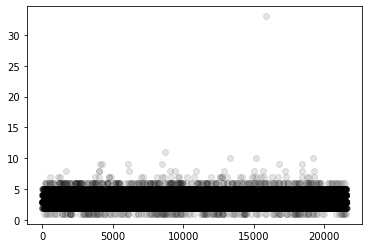

In [22]:
# check the house with 33 bedrooms
plt.scatter(df.index, df.bedrooms, alpha=0.1, color='black');
df[df['bedrooms'] > 30]

From this we see that there is one house has 33 bedrooms while all others have up to 11. A house with 33 bedrooms is probably worng, as it has a relatively low sqft_living and number of bathrooms. Better remove this house from the data

In [23]:
# remove outlier with 33 bedrooms 
df = df[df['bedrooms'] <= 11]

## Save fitted and cleaned dataframes

To use the dataframe in the subsequent notebooks, the fitted and cleaned dataframe is saved as *.csv* in the data folder. 

In [24]:
df.to_csv('data/df_cleaned.csv', index = False, header=True)